In [4]:
*ignore log for the rest of the session;
options nosource nonotes nodetails nodate;;
*omit ods proclabel;
filename csvFile url "http://www.principlesofeconometrics.com/poe5/data/csv/food.csv" ;

proc import datafile=csvFile 
        out=food
        dbms=csv
        replace;
        getnames=yes;  
 run;


9                                                          SAS 시스템

40 rows created in WORK.FOOD from CSVFILE.
  
  
  

10                                                         SAS 시스템

E3969440A681A2408885998500000006


In [24]:
*Food 데이터 셋의 변수들의 요약 통계량을 출력하시오;
proc means data=food;
run;

변수,N,평균,표준편차,최솟값,최댓값
food_exp income,40 40,283.5735000 19.6047500,112.6751810 6.8477726,109.7100000 3.6900000,587.6600000 33.4000000


In [10]:
* 첫번쨰 10개 관측치 출력;
proc print data=food(obs=10);
run;

OBS,food_exp,income
1,115.22,3.69
2,135.98,4.39
3,119.34,4.75
4,114.96,6.03
5,187.05,12.47
6,243.92,12.98
7,267.43,14.2
8,238.71,14.76
9,295.94,15.32
10,317.78,16.39


In [27]:
*food_exp와 income의 관계를 알아보기 위해 산점도 그려보기;
proc gplot data=food;
    plot food_exp*income/ vaxis = axis1 haxis = axis2;
    title '음식소비량(y) vs. 주당 소득(x)';
run;


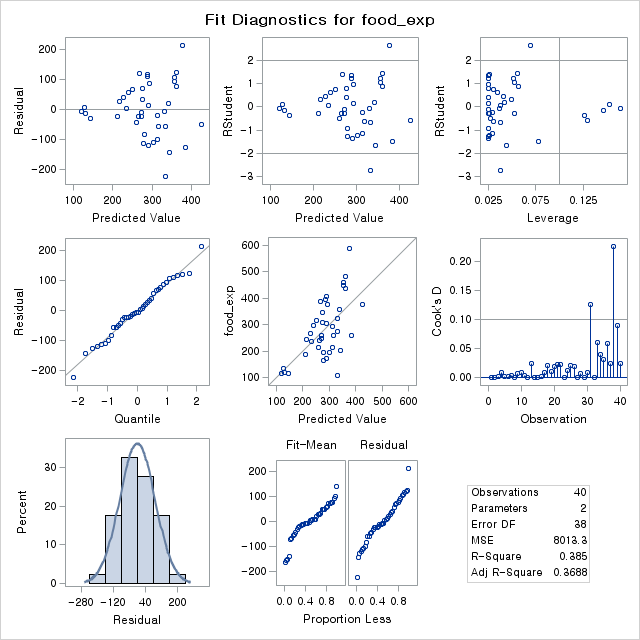
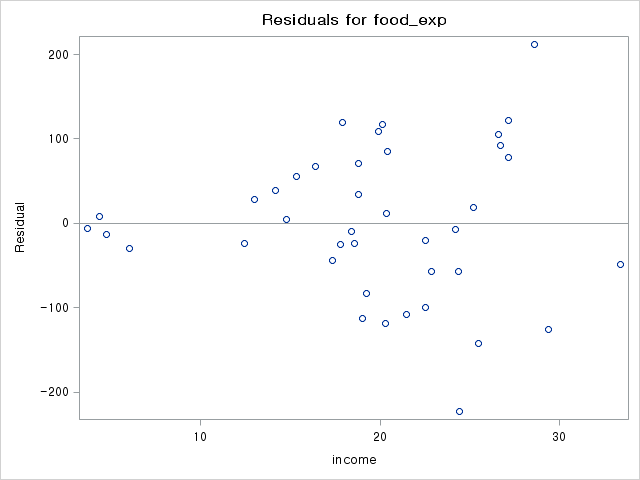
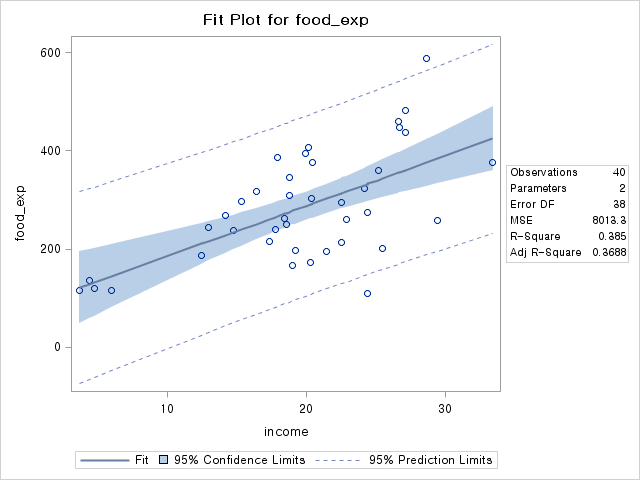

In [32]:
*단순선형회귀 proc reg 을 이용하자;
proc reg data=food;
    model food_exp = income / cov ;
    title '음식소비량 선형회귀';
*Estimated residual 을 저장하자 ;
output out=foodout r=ehat;
title 'regression with residual option';
run;

\begin{bmatrix}
\text{var}(b_1) & \text{cov}(b_1, b_2) \\
\text{cov}(b_1, b_2) & \text{var}(b_2) \\
\end{bmatrix}



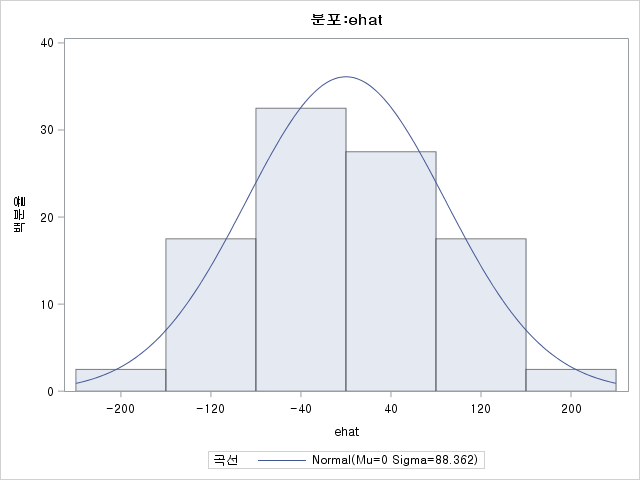

In [33]:
*잔차항을 분석해보자;
proc univariate data=foodout;
    var ehat;
    histogram / normal;
    run;

In [31]:
*proc means를 통해 ANOVA table에 있는 정보를 알 수있다;
proc means data= food n mean css var std cv;
    var food_exp;
run;